importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

reading csv files(dataset)

In [ ]:
sw=pd.read_csv("seattle-weather.csv")
au=pd.read_csv("austin_weather.csv")

checking whether dataset conatins null values

In [ ]:
sw.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
au.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

sepearting required columns from the dataset

In [ ]:
columns_to_separate = ['Date', 'TempHighF','TempAvgF','TempLowF', 'PrecipitationSumInches','Events']
au = au[columns_to_separate]

seperating year from the column data

In [ ]:
sw['year'] = pd.to_datetime(sw['date']).dt.year
au['year'] = pd.to_datetime(au['Date']).dt.year

printing the columns in two datasets

In [ ]:
au.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'PrecipitationSumInches',
       'Events', 'year'],
      dtype='object')

In [ ]:
sw.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year'],
      dtype='object')

removing data before 2013 and after 2015

ploting subplots for austin dataset

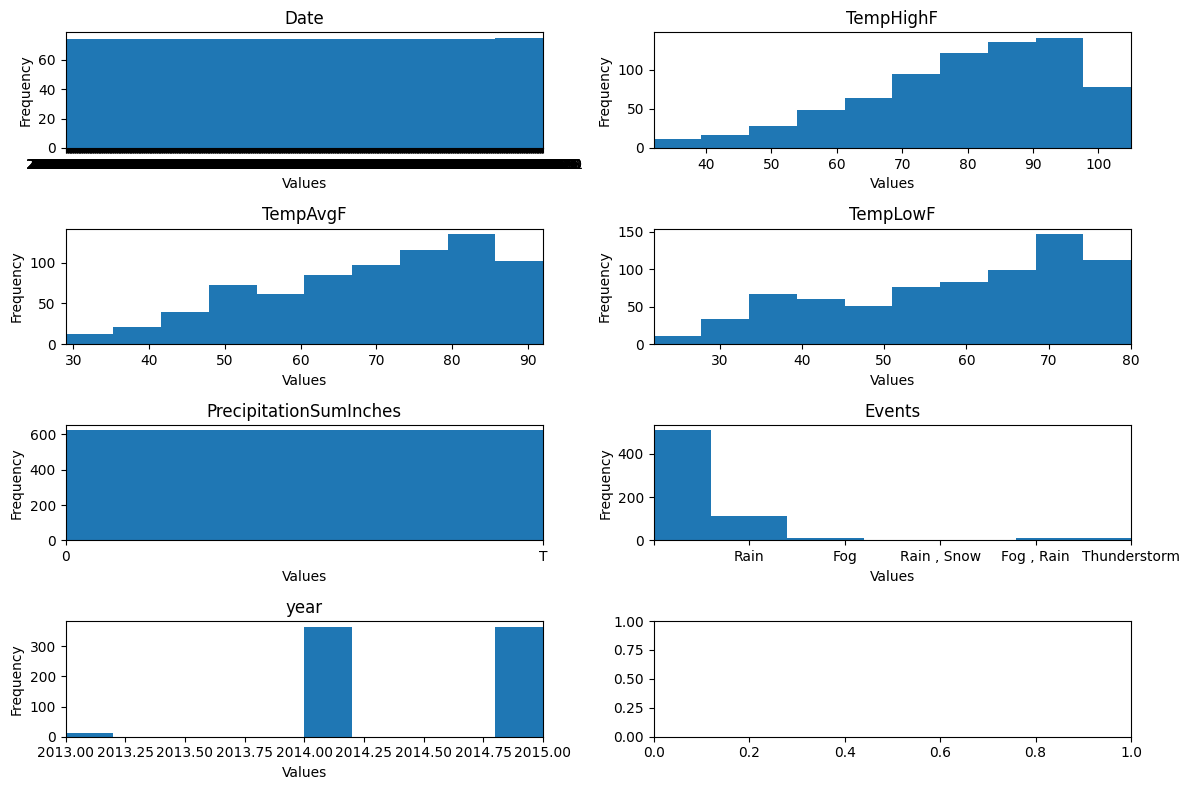

In [ ]:
columns=au.columns
num_cols = len(columns)
num_rows = (num_cols // 2) + (num_cols % 2)  # Adjust the layout based on the number of columns

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 2 * num_rows))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot each column in a separate subplot
for i, column in enumerate(columns):
    axes[i].hist(au[column])  # Adjust the plot type as needed
    axes[i].set_title(column)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(au[column].min(), au[column].max())
plt.tight_layout()

time series data plot

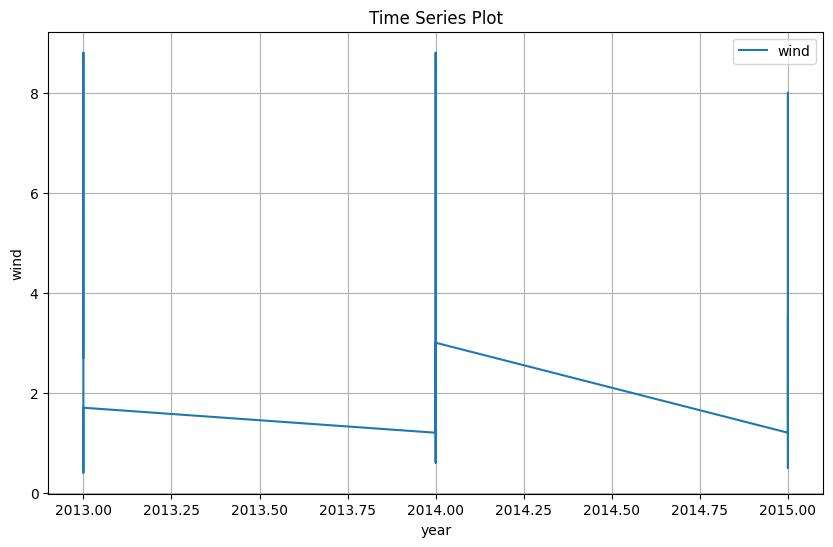

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sw['year'], sw['wind'], label='wind')

# Customize the plot
plt.title('Time Series Plot')
plt.xlabel('year')
plt.ylabel('wind')
plt.legend()
plt.grid(True)

Bar chart of two datasets

<ipython-input-48-ab9cf2cad2d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df1 = au.groupby('year').mean().reset_index()
<ipython-input-48-ab9cf2cad2d3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df2 = sw.groupby('year').mean().reset_index()


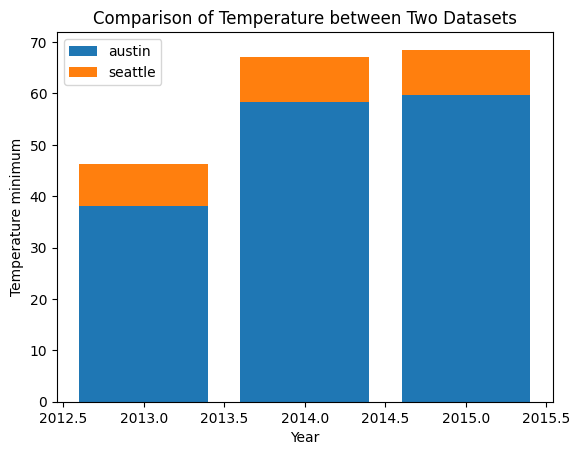

In [ ]:
grouped_df1 = au.groupby('year').mean().reset_index()
grouped_df2 = sw.groupby('year').mean().reset_index()

# Merge the two grouped DataFrames on the 'Year' column
merged_df = pd.merge(grouped_df1, grouped_df2, on='year')

# Create a bar chart
plt.bar(merged_df['year'], merged_df['TempLowF'], label='austin')
plt.bar(merged_df['year'], merged_df['temp_min'], bottom=merged_df['TempLowF'], label='seattle')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature minimum')
plt.title('Comparison of Temperature between Two Datasets')
plt.legend()

# Show the plot

histogram

(array([ 4.,  7., 12., 21., 30., 37., 38., 22., 34., 17., 37., 40., 42.,
        41., 39., 60., 50., 97., 94., 19.]),
 array([22. , 24.9, 27.8, 30.7, 33.6, 36.5, 39.4, 42.3, 45.2, 48.1, 51. ,
        53.9, 56.8, 59.7, 62.6, 65.5, 68.4, 71.3, 74.2, 77.1, 80. ]),
 <BarContainer object of 20 artists>)

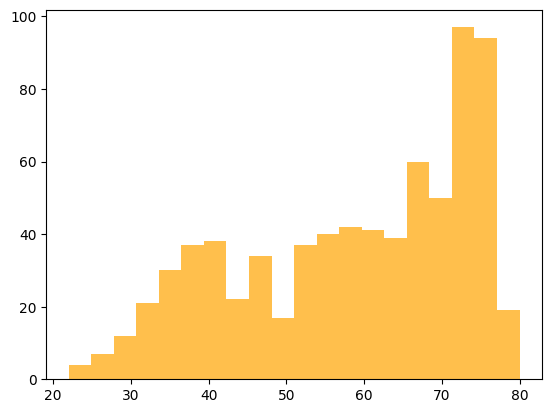

In [ ]:
plt.hist(au['TempLowF'], bins=20, alpha=0.7, label='austin', color='orange')

In [ ]:
# Scatter plots
plt.scatter(au['TempHighF']+np.random.uniform(-0.2, 0.2, len(au)), au['PrecipitationSumInches'], label='Austin', color='blue')
plt.scatter(sw['temp_max']+np.random.uniform(-0.2, 0.2, len(sw)), sw['precipitation'], label='Seattle', color='orange')

scatter plot

Text(0, 0.5, 'Precipitation')

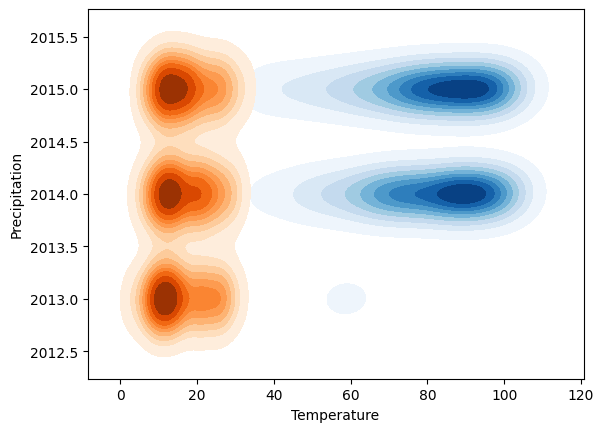

In [ ]:
sns.kdeplot(data=au, x='TempHighF', y='year',  cmap='Blues', fill=True, )
sns.kdeplot(data=sw, x='temp_max', y='year', cmap='Oranges', fill=True)
plt.xlabel('Temperature')
plt.ylabel('Precipitation')